In [ ]:
!pip install -U -q google-generativeai

In [ ]:
#Importações e configurações iniciais
import numpy as np
import pandas as pd
import google.generativeai as its_redu

In [ ]:
from google.colab import userdata
chave_secreta = userdata.get('SECRET_KEY')
its_redu.configure(api_key=chave_secreta)

In [ ]:
for m in its_redu.list_models():
  if 'embedContent' in m.supported_generation_methods:
    print(m.name)

models/embedding-001
models/text-embedding-004


In [ ]:
#Exemplo de embedding
title = "A próxima geração de IA para o Redu.Digital"
sample_text = ("Título: A próxima geração de IA para o Redu.Digital"
    "\n"
    "Artigo completo:\n"
    "\n"
    "O Its.Redu: é uma maneira acessível de explorar e criar tutorias educacionais com aplicações de IA")

embeddings = its_redu.embed_content(model="models/embedding-001",
                                 content=sample_text,
                                 title=title,
                                 task_type="RETRIEVAL_DOCUMENT")

print(embeddings)

{'embedding': [0.056762364, -0.03079109, -0.025643865, 0.007317954, 0.059012696, -0.010023084, 0.0018349093, -0.027418349, -0.015173054, 0.049544215, 0.04517057, 0.030695237, -0.026692027, 0.021061655, 0.016407944, -0.011088939, -0.019128097, -0.014699971, -0.034985155, -0.02115388, 0.0012583294, 0.004385793, -0.0017125192, 0.0004761748, -0.012621437, 0.048837893, 0.007253438, -0.06607066, 0.005783923, 0.020632187, 0.024278041, 0.07520103, -0.007165939, 0.01701626, 0.011213065, -0.019155363, -0.031419005, -0.012990561, 0.009359024, 0.015304714, -0.009390136, -0.027054468, -0.01399897, 0.053131267, -0.012830485, -0.06080134, 0.024676878, 0.013259575, 0.034937453, -0.070285894, 0.0075443964, -0.03379838, 0.06684992, -0.040383063, 0.001890914, -0.001416138, 0.01890395, -0.013442433, 0.0132710785, -0.019221101, -0.020282399, 0.054605294, -0.007291756, 0.0454983, -0.02410333, -0.00011609197, -0.03573204, 0.021367602, 0.010972946, 0.02158384, 0.022374582, -0.03121204, 0.08711058, -0.06167037

In [ ]:
#Listagem de documentos com funcionalidades para o perfil de tutor
doc1 ={
        "Título": "Fonte",
        "Conteúdo": "https://ajuda.redu.digital/en/collections/tutor"}
doc2 ={
        "Título": "Saiba mais (central de ajuda)",
        "Conteúdo": "Ao lado direito da página inicial, abaixo de 'Explore o Redu', encontramos a aba 'Saiba Mais', em que é possível ler mais informações sobre o que é possível fazer com o Redu e ter suas dúvidas respondidas. Ao clicar, você será redirecionado para outra página contendo uma barra de pesquisa, guias de funcionamento do Redu e opções de atendimento online."}
doc3 ={
        "Título": "Opções do usuário",
        "Conteúdo": "O ícone de um boneco ao lado de uma seta para baixo, presente no lado superior direito da tela contempla algumas funções básicas de usuário no lado superior direito, são elas: Meu perfil: Selecione 'editar' nessa aba para alterar as informações que estarão disponibilizadas no seu perfil na aba 'Perfil' (como foto, nome, biografia, data de nascimento e informações adicionais) e salve as alterações no botão azul ao lado direito inferior da página. Ou, para alterar a visibilidade do seu mural, seu e-mail ou sua senha de acesso, selecione a aba 'Conta' e salve as alterações no botão azul ao lado direito inferior da página. Mensagens: Nessa aba será possível que você envie mensagens privadas para seus contatos ou leia mensagens que foram enviadas para você, ao selecionar a opção 'Recebidas'. Para visualizar uma mensagem que você já enviou anteriormente, você poderá selecionar a opção 'Enviadas' para encontrá-la, mas caso deseje enviar uma nova mensagem, basta clicar na caixa azul 'Nova Mensagem' no canto superior direito e informar para quem será destinada à mensagem, o assunto da mensagem e o corpo do texto. Configurações: Selecione 'editar' nessa aba para alterar as informações que estarão disponibilizadas no seu perfil na aba 'Perfil' (como foto, nome, biografia, data de nascimento e informações adicionais) e salve as alterações no botão azul ao lado direito inferior da página. Ou, para alterar a visibilidade do seu mural, seu e-mail ou sua senha de acesso, selecione a aba 'Conta' e salve as alterações no botão azul ao lado direito inferior da página. Sair: Selecione 'sair' para sair da sua conta do Redu. Você será redirecionado para a tela de login."}
doc4 ={
        "Título": "Progresso do módulo (Adm. Ambiente)",
        "Conteúdo": "Se você estiver na versão 2.0: Para acompanhar o seu progresso do módulo, você deverá selecionar a disciplina de sua escolha e depois deverá clicar na caixa de seleção para escolher seu módulo. O progresso dele estará ao lado em formato de círculo, indicando a porcentagem concluída até o momento."}
doc5 ={
        "Título": "Acessar aula (Adm. Ambiente)",
        "Conteúdo": "Para acessar uma aula, você deverá localizar o ambiente em que você está inscrito, ao clicar, selecione a disciplina desejada. Em seguida, você visualizará os módulos da disciplina e ao clicar no nome do módulo desejado, será exibido blocos quadrados com as aulas disponíveis, a partir disso você poderá clicar na aula de sua preferência e já estará acessando o conteúdo desejado."}
doc6 ={
        "Título": "Comentar, pedir ajuda na aula e ver arquivos",
        "Conteúdo": "Para comentar ou pedir ajuda em uma aula você deverá descer a página até abaixo da aula e localizar os botões correspondentes. Em seguida, escreva sua dúvida ou comentário, caso deseje você ainda pode inserir arquivos no botão 'inserir arquivos', em seguida, clique em 'enviar'."}
doc7 ={
        "Título": "Meu perfil (tutor)",
        "Conteúdo": "Selecione 'Editar Conta' e você poderá observar, ao lado esquerdo do seu monitor, opções para edição de 'Bio e Currículo' e 'Configurções de Conta'. Em  'Bio e Currículo' é possível alterar as informações que estarão disponibilizadas no seu perfil (como foto, nome, biografia, data de nascimento e informações adicionais). As alterações podem ser salvas ao clicar no botão azul, localizado no lado inferior direito da página. Já em clicando em 'Configurações de Conta', você pode alterar informações como senha, e-mail, recebimento de notificações por e-mail ou notificações push no celular. Ao terminar as edições, clique em 'Salvar', botão azul presente no espaço inferior direito. Ao lado esquerdo do botão 'Salvar', também existe a opção 'Deletar Conta'."}
doc8 ={
        "Título": "Meus emblemas (tutor)",
        "Conteúdo": "Em ‘Meu perfil’ você pode poderá clicar em ‘Conquistas’ para visualizar os emblemas conquistados em decorrência da sua interação com a plataforma. Os emblemas estão organizados em várias categorias, ao clicar em alguma delas, é possível visualizar os nomes dos emblemas conquistados."}
doc9 ={
        "Título": "Meu mural (tutor)",
        "Conteúdo": "Na parte central da página inicial de acesso, você terá as abas ‘visão geral, ‘meu mural’ e ‘seguindo’. Na aba ‘meu mural’, você será apresentado a todas as suas interações, atualizações, comentários realizados por você em toda a plataforma, e os seus emblemas conquistados. Além disso, também é possível compartilhar informações, pensamentos e anexar arquivos no seu mural, os quais apenas os seus amigos poderão visualizar e responder. Os arquivos anexados podem ser do tipo DOCS, PPTX, PDF e XLXS. Para anexar, você deverá clicar na caixa localizada na parte superior da tela e selecionar a opção ‘Escolher arquivo’, além disso, a caixa de texto não pode ficar em branco, então você deverá escrever algo e finalizar ao clicar em ‘Enviar’, representado pelo botão azul ao lado direito e inferior da caixa de comentários."}
doc10 ={
        "Título": "Meus contatos (tutor)",
        "Conteúdo": "A funcionalidade ‘meus contatos’ está disponível na parte inferior esquerda da tela. Ao clicar em ‘ver todos’, você visualizará sua lista de amigos da plataforma. Se desejar, você pode clicar no nome do amigo de sua escolha e ser redirecionado para o perfil dele. Também é possível excluir uma amizade ao clicar no ‘x’. Para fazer uma nova amizade é preciso digitar o nome do usuário na barra de pesquisa geral e clicar em ‘conectar’ quando encontrar o usuário desejado. Novas amizades também podem ser feitas através da funcionalidade ‘sugestões de amizade’, disponível na parte inferior direita da página."}
doc11 ={
        "Título": "Visão geral (tutor)",
        "Conteúdo": "Assim que feito o acesso ao Redu, você poderá visualizar a aba ‘Visão Geral’, que possui um mural geral da plataforma, contendo as atualizações realizadas por você e seus amigos, atalhos para os seus contatos, seus ambientes, suas conquistas, solicitações e sugestões de amizade e muito mais. Caso esteja em outra tela e deseje retornar à página inicial, basta clicar em ‘Redu’, na parte superior esquerda da tela."}
doc12 ={
        "Título": "Mensagens (tutor)",
        "Conteúdo": "Nesta aba você poderá visualizar, responder e deletar mensagens recebidas e enviadas entre sua rede de amigos. Também é possível enviar mensagens privadas para seus contatos ou ler mensagens que foram enviadas para você. Caso deseje enviar uma nova mensagem, basta buscar um contato na barra de pesquisa e clicar em seu nome. O chat com o contato selecionado será aberto ao lado direito. Após digitar sua mensagem, clique na seta azul do canto inferior direito para que sua mensagem seja enviada. O ícone ‘i’, disponível na parte superior direita do chat exibe as informações do contato, como os cursos em que ele está inscrito."}
doc13 ={
        "Título": "Ambientes (tutor)",
        "Conteúdo": "Ao fazer login em sua conta do Redu, no lado superior direito da página você encontrará uma lista dos ambientes disponíveis para seu acesso. Caso esteja inscrito em muitos cursos, clique em ‘ver todos’ para ter acesso à totalidade de cursos. Também é possível visualizar os ambientes na barra lateral esquerda, abaixo de ‘meu perfil’."}
doc14 ={
        "Título": "Configurações (tutor)",
        "Conteúdo": "Selecione a barra lateral esquerda e escolha a opção ‘configurações’. Nesta aba você poderá alterar as informações que estarão disponibilizadas no seu perfil e salvar as alterações no botão azul ao lado direito inferior da página. Ou, para alterar a visibilidade do seu mural, seu e-mail ou sua senha de acesso, selecione a aba ‘Conta’ e salve as alterações no botão azul ao lado direito inferior da página."}
doc15 ={
        "Título": "Cursos acessados recentemente (tutor)",
        "Conteúdo": "Esta funcionalidade está disponível apenas na versão 1.0: No lado esquerdo da página inicial, logo abaixo de configurações é possível visualizar os três últimos cursos acessados recentemente. Sendo possível, assim, localizar o curso desejado com mais facilidade."}
doc16 ={
        "Título": "Barra de pesquisa (tutor)",
        "Conteúdo": "Para realizar uma pesquisa na plataforma, basta encontrar no canto superior direito da tela, uma barra de pesquisa, sinalizada pela imagem de uma lupa e algumas linhas. Para finalizar sua pesquisa, basta clicar no conteúdo desejado."}
doc17 ={
        "Título": "Status do perfil (tutor)",
        "Conteúdo": "Esta funcionalidade está disponível apenas na versão 1.0: No lado direito da página inicial, abaixo da caixa de pesquisa, é possível visualizar o status de informações do seu perfil. Isso diz respeito a dados preenchidos pelo próprio usuário, por exemplo, foto, profissão, idiomas, biografia, etc."}
doc18 ={
        "Título": "Explore o Redu (tutor)",
        "Conteúdo": "Esta funcionalidade está disponível apenas na versão 1.0: No lado direito da página inicial, abaixo de ‘status do perfil’, ao clicar em ‘Explore o Redu’, você tem acesso a um esquema explicativo sobre o funcionamento dos ambientes da Redu."}
doc19 ={
        "Título": "Saiba mais - central de ajuda (tutor)",
        "Conteúdo": "Se você estiver na versão 2.0: Ao lado direito da página inicial, abaixo de ‘Mensagens’, encontramos a aba ‘Central de Ajuda’, em que é possível ler mais informações sobre o que é possível fazer com a Redu e ter suas dúvidas respondidas. Ao clicar, você será redirecionado para outra página contendo guias de funcionamento da Redu e opções de atendimento online. Guia Básico: Nesta aba é possível ter acesso a orientações sobre os primeiros passos na plataforma, como, por exemplo, a efetuação do cadastro e edições de informações do perfil. Guia do Gestor: Nesta aba é possível entender as atribuições do gestor no ambiente, o processo de convidar alunos para o curso e demais informações de gerenciamento. Guia do Aluno: Nesta aba é possível ter acesso aos canais de atendimento online e central de ajuda do Redu. Guia do Professor: Nesta aba é possível ter acesso aos canais de atendimento online e central de ajuda do Redu. Guia do Desenvolvedor: Nesta aba é possível ter acesso aos canais de atendimento online e central de ajuda do Redu. mais: [https://ajuda.redu.digital/]"}
doc20 ={
        "Título": "Conecte-se (tutor)",
        "Conteúdo": "Ao lado direito da página inicial de acesso, logo abaixo do item ‘conquistas recentes’, é possível encontrar a aba ‘sugestões de amizade’, que diz respeito às conexões de amizade na plataforma. Serão exibidos os perfis de amigos prováveis, caso deseje conectar-se com eles, basta clicar em ‘conectar’. A partir disso, é só esperar o outro usuário aceitar o convite e você verá atualizações dele em sua página inicial."}
doc21 ={
        "Título": "Fale Conosco (tutor)",
        "Conteúdo": "No rodapé da página inicial da Redu, é possível encontrar o ícone de uma interrogação, referente à aba ‘Fale Conosco’. Ao clicar, o usuário visualiza um pop-up, contendo campos que devem ser preenchidos, como nome, e-mail, assunto, mensagem, entre outros. Uma vez preenchido e enviado, o formulário será acessado pela equipe de atendimento o Redu, que manterá contato com o usuário por e-mail até que sua dúvida seja solucionada."}
doc22 ={
        "Título": "Opções do usuário (tutor)",
        "Conteúdo": "O ícone de uma lupa e uma lista presente no lado superior esquerdo da tela contempla algumas funções básicas de usuário, são elas: Página inicial: Nesta botão é possível ter a visão geral da plataforma. Nela está o mural geral, seus ambientes, suas conquistas, solicitações e sugestões de amizade e muito mais. Caso esteja em outra tela e deseje retornar à página inicial, basta clicar nesta opção. Meus ambientes: Este botão leva o usuário a uma lista dos ambientes disponíveis para seu acesso. Conquistas: Em ‘conquistas’ o usuário irá visualizar os emblemas conquistados em decorrência da sua interação com a plataforma. Os emblemas estão organizados em várias categorias, ao clicar em alguma delas, é possível visualizar os nomes dos emblemas conquistados. Contatos: Neste botão você visualizará sua lista de amigos da plataforma. Se desejar, você pode clicar no nome do amigo de sua escolha e ser redirecionado para o perfil dele. Também é possível excluir uma amizade ao clicar no ‘x’. Para fazer uma nova amizade é preciso digitar o nome do usuário na barra de pesquisa geral e clicar em ‘conectar’ quando encontrar o usuário desejado. Novas amizades também podem ser feitas através da funcionalidade ‘sugestões de amizade’, disponível na parte inferior direita da página. Central de ajuda: Ao clicar neste botão, o usuário é redirecionado para a página do ‘fale conosco’. Esta página contém campos que devem ser preenchidos, como nome, e-mail, assunto, mensagem, entre outros. Uma vez preenchido e enviado, o formulário será acessado pela equipe de atendimento o Redu, que manterá contato com o usuário por e-mail até que sua dúvida seja solucionada. Abaixo desta aba é possível encontrar o manual da plataforma. Configurações: Nesta aba você poderá alterar as informações que estarão disponibilizadas no seu perfil e salvar as alterações no botão azul ao lado direito inferior da página. Ou, para alterar a visibilidade do seu mural, seu e-mail ou sua senha de acesso, selecione a aba ‘Conta’ e salve as alterações no botão azul ao lado direito inferior da página. Sair: Selecione ‘sair’ para sair da sua conta do Redu. Você será redirecionado para a tela de login."}
doc23 ={
        "Título": "Listar Ambientes (tutor)",
        "Conteúdo": "Ao fazer login em sua conta da Redu, ao lado esquerdo so seu monitor, você encontrará abas como ‘início’ e ‘Ambientes’.  Para visualizar a lista dos ambientes disponíveis para seu acesso, clique na aba ‘Ambientes’, assim será possível encontrar os ambientes aos quais você pertence. Para ‘Início’, basta clicar no logo da Redu, no topo da página.  Você também pode acessar seus ambientes através da lista de ambientes que existe na redu, ao lado direito da sua tela."}
doc24 ={
        "Título": "Detalhar Ambiente (tutor)",
        "Conteúdo": "Para detalhar o ambiente no qual você está inserido, você deve selecioná-lo, e assim as informações sobre esse ambiente em específico serão apresentadas, tais como: cursos e membros."}
doc25 ={
        "Título": "Listar membros do ambiente (tutor)",
        "Conteúdo": "Para visualizar os membros existentes em um ambiente você deverá selecionar o ambiente em questão e clicar em ‘membros’, abaixo de ‘conteúdo’, na barra lateral esquerda. Ao selecionar essa opção, você poderá opta, por visualizar ‘Todos’, apenas ‘Professores’, ‘Tutores’ ou ‘Alunos’. Também é possível buscar um usuário na barra de busca e visualizar um perfil clicando nele. Caso deseje visualizar mais membros do que estão sendo apresentados, basta descer a página e selecionar a opção ‘Mostrar mais…’ representada com uma seta apontada para baixo."}
doc26 ={
        "Título": "Classificação dos alunos no ambiente (tutor)",
        "Conteúdo": "Para visualizar a classificação nos ambientes, você deve clicar no ambiente que deseja visualizar para ser redirecionado a uma nova aba. Nessa aba, ao lado esquerdo da tela, você observará o botão ‘Classificação’. Ao clicar no botão ‘Classificação’, você terá acesso a informações como posição, nome e pontuação do usuário do Ambiente."}
doc27 ={
        "Título": "Listar cursos (tutor)",
        "Conteúdo": "Para visualizar os cursos existentes em um certo ambiente, você deverá selecionar o ambiente de sua escolha e eles serão apresentados em blocos, um ao lado do outro."}
doc28 ={
        "Título": "Detalhar curso (tutor)",
        "Conteúdo": "Para detalhar algum curso, você deve selecioná-lo e, assim, as informações sobre esse curso em específico serão apresentadas, tais como: disciplinas cadastradas nele e membros."}
doc29 ={
        "Título": "Listar membros do curso (tutor)",
        "Conteúdo": "Para visualizar os membros existentes em um curso você deverá selecionar o ambiente e curso em questão e clicar em ‘membros’, abaixo de ‘conteúdo’, na barra lateral esquerda. Ao selecionar essa opção, você poderá opta, por visualizar ‘todos’, apenas ‘professores’, ‘tutores’ ou ‘alunos’. Também é possível buscar um usuário na barra de busca e visualizar um perfil clicando nele. Caso deseje visualizar mais membros do que estão sendo apresentados, basta descer a página e selecionar a opção ‘mostrar mais…’ representada com uma seta apontada para baixo."}
doc30 ={
        "Título": "Classificação dos alunos no curso (tutor)",
        "Conteúdo": "Para visualizar a classificação dos alunos no curso, você deverá selecionar o curso que deseja acessar informações. Ao lado esquerdo da sua tela, será possível visualizar o botão ‘Classificação’. Clicando nesse botão, você será redirecionado para a aba de classificação, que possui posição, nome e pontuação de cada usuário no curso."}
doc31 ={
        "Título": "Abandonar curso (tutor)",
        "Conteúdo": "Se você estiver na versão 1.0: Caso deseje abandonar um curso no qual está inserido, basta selecionar o curso de sua escolha e ao lado direito da página, ao lado do nome ‘Disciplinas’ haverá a opção ‘Abandonar Curso’. Basta selecionar essa opção que irá aparecer uma notificação pop up no seu dispositivo, perguntando se você tem certeza que deseja abandonar o curso, tendo em vista que a ação não poderá ser desfeita. Dessa forma, você deverá selecionar ‘OK’ se desejar abandoná-lo definitivamente ou ‘Cancelar’ para se manter no mesmo."}
doc32 ={
        "Título": "Listar disciplinas (tutor)",
        "Conteúdo": "Para visualizar as disciplinas existentes em um certo curso, você deverá selecionar o ambiente, em seguida o curso de sua escolha e as disciplinas serão apresentados em blocos, uma ao lado da outra."}
doc33 ={
        "Título": "Detalhar disciplina (tutor)",
        "Conteúdo": "Para detalhar uma disciplina na qual você está inserido, você deve selecioná-la, assim as informações sobre essa disciplina em específico serão apresentadas, tais como: conteúdo, referente à seleção de módulo, discussão, membros e aulas."}
doc34 ={
        "Título": "Listar módulos (tutor)",
        "Conteúdo": "Para visualizar os módulos existentes em uma disciplina, você deverá selecionar o ambiente, o curso e a disciplina de sua escolha. Em seguida, você visualizará uma seleção de módulos existentes."}
doc35 ={
        "Título": "Detalhar módulos (tutor)",
        "Conteúdo": "Para detalhar um módulo no qual você está inserido, você deve selecioná-lo, assim as informações sobre esse módulo em específico serão apresentadas, tais como: aulas, discussão e membros. Também é possível visualizar o progresso no módulo, disponível não lado do nome do módulo."}
doc36 ={
        "Título": "Progresso do módulo (tutor)",
        "Conteúdo": "Para acompanhar o seu progresso do módulo, você deverá selecionar a disciplina de sua escolha e depois deverá clicar na caixa de seleção para escolher seu módulo. O progresso dele estará ao lado em formato de círculo, indicando a porcentagem concluída até o momento."}
doc37 ={
        "Título": "Acessar aula (tutor)",
        "Conteúdo": "Para acessar uma aula, você deverá localizar o ambiente em que você está inscrito, ao clicar, selecione a disciplina desejada. Em seguida, você visualizará os módulos da disciplina e ao clicar no nome do módulo desejado, será exibido blocos quadrados com as aulas disponíveis, a partir disso você poderá clicar na aula de sua preferência e já estará acessando o conteúdo desejado."}
doc38 ={
        "Título": "Avaliar as aulas (tutor)",
        "Conteúdo": "Esta funcionalidade está disponível apenas na versão 1.0: Ao acessar uma aula você pode deixar a sua avaliação do conteúdo através da classificação por estrelas. Esta funcionalidade, que dispõe de 5 estrelas avaliativas, está localizada logo acima do nome da aula, no lado direito da tela. Basta clicar na estrela desejada e já terá avaliado."}

In [ ]:
# Listagem de documentos
documents = [doc1, doc2, doc3, doc4, doc5, doc6, doc7, doc8, doc9, doc10, doc11, doc12, doc13, doc14, doc15, doc16, doc17, doc18, doc19, doc20, doc21, doc22, doc23, doc24, doc25, doc26, doc27, doc28, doc29, doc30, doc31, doc32, doc33, doc34, doc35, doc36, doc37, doc38]

documento sem os títulos (tutor, adm. plataforma)

In [ ]:
#Listagem de documentos com funcionalidades para o perfil de tutor
doc2 ={
        "Título": "Central de ajuda",
        "Conteúdo": "Ao lado direito da página inicial, abaixo de 'Explore o Redu', encontramos a aba 'Saiba Mais', em que é possível ler mais informações sobre o que é possível fazer com o Redu e ter suas dúvidas respondidas. Ao clicar, você será redirecionado para outra página contendo uma barra de pesquisa, guias de funcionamento do Redu e opções de atendimento online."}
doc3 ={
        "Título": "Opções do usuário",
        "Conteúdo": "O ícone de um boneco ao lado de uma seta para baixo, presente no lado superior direito da tela contempla algumas funções básicas de usuário no lado superior direito, são elas: Meu perfil: Selecione 'editar' nessa aba para alterar as informações que estarão disponibilizadas no seu perfil na aba 'Perfil' (como foto, nome, biografia, data de nascimento e informações adicionais) e salve as alterações no botão azul ao lado direito inferior da página. Ou, para alterar a visibilidade do seu mural, seu e-mail ou sua senha de acesso, selecione a aba 'Conta' e salve as alterações no botão azul ao lado direito inferior da página. Mensagens: Nessa aba será possível que você envie mensagens privadas para seus contatos ou leia mensagens que foram enviadas para você, ao selecionar a opção 'Recebidas'. Para visualizar uma mensagem que você já enviou anteriormente, você poderá selecionar a opção 'Enviadas' para encontrá-la, mas caso deseje enviar uma nova mensagem, basta clicar na caixa azul 'Nova Mensagem' no canto superior direito e informar para quem será destinada à mensagem, o assunto da mensagem e o corpo do texto. Configurações: Selecione 'editar' nessa aba para alterar as informações que estarão disponibilizadas no seu perfil na aba 'Perfil' (como foto, nome, biografia, data de nascimento e informações adicionais) e salve as alterações no botão azul ao lado direito inferior da página. Ou, para alterar a visibilidade do seu mural, seu e-mail ou sua senha de acesso, selecione a aba 'Conta' e salve as alterações no botão azul ao lado direito inferior da página. Sair: Selecione 'sair' para sair da sua conta do Redu. Você será redirecionado para a tela de login."}
doc4 ={
        "Título": "Progresso do módulo",
        "Conteúdo": "Se você estiver na versão 2.0: Para acompanhar o seu progresso do módulo, você deverá selecionar a disciplina de sua escolha e depois deverá clicar na caixa de seleção para escolher seu módulo. O progresso dele estará ao lado em formato de círculo, indicando a porcentagem concluída até o momento."}
doc5 ={
        "Título": "Acessar aula",
        "Conteúdo": "Para acessar uma aula, você deverá localizar o ambiente em que você está inscrito, ao clicar, selecione a disciplina desejada. Em seguida, você visualizará os módulos da disciplina e ao clicar no nome do módulo desejado, será exibido blocos quadrados com as aulas disponíveis, a partir disso você poderá clicar na aula de sua preferência e já estará acessando o conteúdo desejado."}
doc6 ={
        "Título": "Comentar, pedir ajuda na aula e ver arquivos",
        "Conteúdo": "Para comentar ou pedir ajuda em uma aula você deverá descer a página até abaixo da aula e localizar os botões correspondentes. Em seguida, escreva sua dúvida ou comentário, caso deseje você ainda pode inserir arquivos no botão 'inserir arquivos', em seguida, clique em 'enviar'."}
doc7 ={
        "Título": "Meu perfil",
        "Conteúdo": "Selecione 'Editar Conta' e você poderá observar, ao lado esquerdo do seu monitor, opções para edição de 'Bio e Currículo' e 'Configurções de Conta'. Em  'Bio e Currículo' é possível alterar as informações que estarão disponibilizadas no seu perfil (como foto, nome, biografia, data de nascimento e informações adicionais). As alterações podem ser salvas ao clicar no botão azul, localizado no lado inferior direito da página. Já em clicando em 'Configurações de Conta', você pode alterar informações como senha, e-mail, recebimento de notificações por e-mail ou notificações push no celular. Ao terminar as edições, clique em 'Salvar', botão azul presente no espaço inferior direito. Ao lado esquerdo do botão 'Salvar', também existe a opção 'Deletar Conta'."}
doc8 ={
        "Título": "Meus emblemas",
        "Conteúdo": "Em ‘Meu perfil’ você pode poderá clicar em ‘Conquistas’ para visualizar os emblemas conquistados em decorrência da sua interação com a plataforma. Os emblemas estão organizados em várias categorias, ao clicar em alguma delas, é possível visualizar os nomes dos emblemas conquistados."}
doc9 ={
        "Título": "Meu mural",
        "Conteúdo": "Na parte central da página inicial de acesso, você terá as abas ‘visão geral, ‘meu mural’ e ‘seguindo’. Na aba ‘meu mural’, você será apresentado a todas as suas interações, atualizações, comentários realizados por você em toda a plataforma, e os seus emblemas conquistados. Além disso, também é possível compartilhar informações, pensamentos e anexar arquivos no seu mural, os quais apenas os seus amigos poderão visualizar e responder. Os arquivos anexados podem ser do tipo DOCS, PPTX, PDF e XLXS. Para anexar, você deverá clicar na caixa localizada na parte superior da tela e selecionar a opção ‘Escolher arquivo’, além disso, a caixa de texto não pode ficar em branco, então você deverá escrever algo e finalizar ao clicar em ‘Enviar’, representado pelo botão azul ao lado direito e inferior da caixa de comentários."}
doc10 ={
        "Título": "Meus contatos",
        "Conteúdo": "A funcionalidade ‘meus contatos’ está disponível na parte inferior esquerda da tela. Ao clicar em ‘ver todos’, você visualizará sua lista de amigos da plataforma. Se desejar, você pode clicar no nome do amigo de sua escolha e ser redirecionado para o perfil dele. Também é possível excluir uma amizade ao clicar no ‘x’. Para fazer uma nova amizade é preciso digitar o nome do usuário na barra de pesquisa geral e clicar em ‘conectar’ quando encontrar o usuário desejado. Novas amizades também podem ser feitas através da funcionalidade ‘sugestões de amizade’, disponível na parte inferior direita da página."}
doc11 ={
        "Título": "Visão geral",
        "Conteúdo": "Assim que feito o acesso ao Redu, você poderá visualizar a aba ‘Visão Geral’, que possui um mural geral da plataforma, contendo as atualizações realizadas por você e seus amigos, atalhos para os seus contatos, seus ambientes, suas conquistas, solicitações e sugestões de amizade e muito mais. Caso esteja em outra tela e deseje retornar à página inicial, basta clicar em ‘Redu’, na parte superior esquerda da tela."}
doc12 ={
        "Título": "Mensagens",
        "Conteúdo": "Nesta aba você poderá visualizar, responder e deletar mensagens recebidas e enviadas entre sua rede de amigos. Também é possível enviar mensagens privadas para seus contatos ou ler mensagens que foram enviadas para você. Caso deseje enviar uma nova mensagem, basta buscar um contato na barra de pesquisa e clicar em seu nome. O chat com o contato selecionado será aberto ao lado direito. Após digitar sua mensagem, clique na seta azul do canto inferior direito para que sua mensagem seja enviada. O ícone ‘i’, disponível na parte superior direita do chat exibe as informações do contato, como os cursos em que ele está inscrito."}
doc13 ={
        "Título": "Ambientes",
        "Conteúdo": "Ao fazer login em sua conta do Redu, no lado superior direito da página você encontrará uma lista dos ambientes disponíveis para seu acesso. Caso esteja inscrito em muitos cursos, clique em ‘ver todos’ para ter acesso à totalidade de cursos. Também é possível visualizar os ambientes na barra lateral esquerda, abaixo de ‘meu perfil’."}
doc14 ={
        "Título": "Configurações",
        "Conteúdo": "Selecione a barra lateral esquerda e escolha a opção ‘configurações’. Nesta aba você poderá alterar as informações que estarão disponibilizadas no seu perfil e salvar as alterações no botão azul ao lado direito inferior da página. Ou, para alterar a visibilidade do seu mural, seu e-mail ou sua senha de acesso, selecione a aba ‘Conta’ e salve as alterações no botão azul ao lado direito inferior da página."}
doc15 ={
        "Título": "Cursos acessados recentemente",
        "Conteúdo": "Esta funcionalidade está disponível apenas na versão 1.0: No lado esquerdo da página inicial, logo abaixo de configurações é possível visualizar os três últimos cursos acessados recentemente. Sendo possível, assim, localizar o curso desejado com mais facilidade."}
doc16 ={
        "Título": "Barra de pesquisa",
        "Conteúdo": "Para realizar uma pesquisa na plataforma, basta encontrar no canto superior direito da tela, uma barra de pesquisa, sinalizada pela imagem de uma lupa e algumas linhas. Para finalizar sua pesquisa, basta clicar no conteúdo desejado."}
doc17 ={
        "Título": "Status do perfil",
        "Conteúdo": "Esta funcionalidade está disponível apenas na versão 1.0: No lado direito da página inicial, abaixo da caixa de pesquisa, é possível visualizar o status de informações do seu perfil. Isso diz respeito a dados preenchidos pelo próprio usuário, por exemplo, foto, profissão, idiomas, biografia, etc."}
doc18 ={
        "Título": "Explore o Redu",
        "Conteúdo": "Esta funcionalidade está disponível apenas na versão 1.0: No lado direito da página inicial, abaixo de ‘status do perfil’, ao clicar em ‘Explore o Redu’, você tem acesso a um esquema explicativo sobre o funcionamento dos ambientes da Redu."}
doc20 ={
        "Título": "Conecte-se",
        "Conteúdo": "Ao lado direito da página inicial de acesso, logo abaixo do item ‘conquistas recentes’, é possível encontrar a aba ‘sugestões de amizade’, que diz respeito às conexões de amizade na plataforma. Serão exibidos os perfis de amigos prováveis, caso deseje conectar-se com eles, basta clicar em ‘conectar’. A partir disso, é só esperar o outro usuário aceitar o convite e você verá atualizações dele em sua página inicial."}
doc21 ={
        "Título": "Fale Conosco",
        "Conteúdo": "No rodapé da página inicial da Redu, é possível encontrar o ícone de uma interrogação, referente à aba ‘Fale Conosco’. Ao clicar, o usuário visualiza um pop-up, contendo campos que devem ser preenchidos, como nome, e-mail, assunto, mensagem, entre outros. Uma vez preenchido e enviado, o formulário será acessado pela equipe de atendimento o Redu, que manterá contato com o usuário por e-mail até que sua dúvida seja solucionada."}
doc22 ={
        "Título": "Opções do usuário",
        "Conteúdo": "O ícone de uma lupa e uma lista presente no lado superior esquerdo da tela contempla algumas funções básicas de usuário, são elas: Página inicial: Nesta botão é possível ter a visão geral da plataforma. Nela está o mural geral, seus ambientes, suas conquistas, solicitações e sugestões de amizade e muito mais. Caso esteja em outra tela e deseje retornar à página inicial, basta clicar nesta opção. Meus ambientes: Este botão leva o usuário a uma lista dos ambientes disponíveis para seu acesso. Conquistas: Em ‘conquistas’ o usuário irá visualizar os emblemas conquistados em decorrência da sua interação com a plataforma. Os emblemas estão organizados em várias categorias, ao clicar em alguma delas, é possível visualizar os nomes dos emblemas conquistados. Contatos: Neste botão você visualizará sua lista de amigos da plataforma. Se desejar, você pode clicar no nome do amigo de sua escolha e ser redirecionado para o perfil dele. Também é possível excluir uma amizade ao clicar no ‘x’. Para fazer uma nova amizade é preciso digitar o nome do usuário na barra de pesquisa geral e clicar em ‘conectar’ quando encontrar o usuário desejado. Novas amizades também podem ser feitas através da funcionalidade ‘sugestões de amizade’, disponível na parte inferior direita da página. Central de ajuda: Ao clicar neste botão, o usuário é redirecionado para a página do ‘fale conosco’. Esta página contém campos que devem ser preenchidos, como nome, e-mail, assunto, mensagem, entre outros. Uma vez preenchido e enviado, o formulário será acessado pela equipe de atendimento o Redu, que manterá contato com o usuário por e-mail até que sua dúvida seja solucionada. Abaixo desta aba é possível encontrar o manual da plataforma. Configurações: Nesta aba você poderá alterar as informações que estarão disponibilizadas no seu perfil e salvar as alterações no botão azul ao lado direito inferior da página. Ou, para alterar a visibilidade do seu mural, seu e-mail ou sua senha de acesso, selecione a aba ‘Conta’ e salve as alterações no botão azul ao lado direito inferior da página. Sair: Selecione ‘sair’ para sair da sua conta do Redu. Você será redirecionado para a tela de login."}
doc23 ={
        "Título": "Listar Ambientes",
        "Conteúdo": "Ao fazer login em sua conta da Redu, ao lado esquerdo so seu monitor, você encontrará abas como ‘início’ e ‘Ambientes’.  Para visualizar a lista dos ambientes disponíveis para seu acesso, clique na aba ‘Ambientes’, assim será possível encontrar os ambientes aos quais você pertence. Para ‘Início’, basta clicar no logo da Redu, no topo da página.  Você também pode acessar seus ambientes através da lista de ambientes que existe na redu, ao lado direito da sua tela."}
doc24 ={
        "Título": "Detalhar Ambiente",
        "Conteúdo": "Para detalhar o ambiente no qual você está inserido, você deve selecioná-lo, e assim as informações sobre esse ambiente em específico serão apresentadas, tais como: cursos e membros."}
doc25 ={
        "Título": "Listar membros do ambiente",
        "Conteúdo": "Para visualizar os membros existentes em um ambiente você deverá selecionar o ambiente em questão e clicar em ‘membros’, abaixo de ‘conteúdo’, na barra lateral esquerda. Ao selecionar essa opção, você poderá opta, por visualizar ‘Todos’, apenas ‘Professores’, ‘Tutores’ ou ‘Alunos’. Também é possível buscar um usuário na barra de busca e visualizar um perfil clicando nele. Caso deseje visualizar mais membros do que estão sendo apresentados, basta descer a página e selecionar a opção ‘Mostrar mais…’ representada com uma seta apontada para baixo."}
doc26 ={
        "Título": "Classificação dos alunos no ambiente",
        "Conteúdo": "Para visualizar a classificação nos ambientes, você deve clicar no ambiente que deseja visualizar para ser redirecionado a uma nova aba. Nessa aba, ao lado esquerdo da tela, você observará o botão ‘Classificação’. Ao clicar no botão ‘Classificação’, você terá acesso a informações como posição, nome e pontuação do usuário do Ambiente."}
doc27 ={
        "Título": "Listar cursos",
        "Conteúdo": "Para visualizar os cursos existentes em um certo ambiente, você deverá selecionar o ambiente de sua escolha e eles serão apresentados em blocos, um ao lado do outro."}
doc28 ={
        "Título": "Detalhar curso",
        "Conteúdo": "Para detalhar algum curso, você deve selecioná-lo e, assim, as informações sobre esse curso em específico serão apresentadas, tais como: disciplinas cadastradas nele e membros."}
doc29 ={
        "Título": "Listar membros do curso",
        "Conteúdo": "Para visualizar os membros existentes em um curso você deverá selecionar o ambiente e curso em questão e clicar em ‘membros’, abaixo de ‘conteúdo’, na barra lateral esquerda. Ao selecionar essa opção, você poderá opta, por visualizar ‘todos’, apenas ‘professores’, ‘tutores’ ou ‘alunos’. Também é possível buscar um usuário na barra de busca e visualizar um perfil clicando nele. Caso deseje visualizar mais membros do que estão sendo apresentados, basta descer a página e selecionar a opção ‘mostrar mais…’ representada com uma seta apontada para baixo."}
doc30 ={
        "Título": "Classificação dos alunos no curso",
        "Conteúdo": "Para visualizar a classificação dos alunos no curso, você deverá selecionar o curso que deseja acessar informações. Ao lado esquerdo da sua tela, será possível visualizar o botão ‘Classificação’. Clicando nesse botão, você será redirecionado para a aba de classificação, que possui posição, nome e pontuação de cada usuário no curso."}
doc31 ={
        "Título": "Abandonar curso",
        "Conteúdo": "Se você estiver na versão 1.0: Caso deseje abandonar um curso no qual está inserido, basta selecionar o curso de sua escolha e ao lado direito da página, ao lado do nome ‘Disciplinas’ haverá a opção ‘Abandonar Curso’. Basta selecionar essa opção que irá aparecer uma notificação pop up no seu dispositivo, perguntando se você tem certeza que deseja abandonar o curso, tendo em vista que a ação não poderá ser desfeita. Dessa forma, você deverá selecionar ‘OK’ se desejar abandoná-lo definitivamente ou ‘Cancelar’ para se manter no mesmo."}
doc32 ={
        "Título": "Listar disciplinas",
        "Conteúdo": "Para visualizar as disciplinas existentes em um certo curso, você deverá selecionar o ambiente, em seguida o curso de sua escolha e as disciplinas serão apresentados em blocos, uma ao lado da outra."}
doc33 ={
        "Título": "Detalhar disciplina",
        "Conteúdo": "Para detalhar uma disciplina na qual você está inserido, você deve selecioná-la, assim as informações sobre essa disciplina em específico serão apresentadas, tais como: conteúdo, referente à seleção de módulo, discussão, membros e aulas."}
doc34 ={
        "Título": "Listar módulos",
        "Conteúdo": "Para visualizar os módulos existentes em uma disciplina, você deverá selecionar o ambiente, o curso e a disciplina de sua escolha. Em seguida, você visualizará uma seleção de módulos existentes."}
doc35 ={
        "Título": "Detalhar módulos",
        "Conteúdo": "Para detalhar um módulo no qual você está inserido, você deve selecioná-lo, assim as informações sobre esse módulo em específico serão apresentadas, tais como: aulas, discussão e membros. Também é possível visualizar o progresso no módulo, disponível não lado do nome do módulo."}
doc38 ={
        "Título": "Avaliar as aulas",
        "Conteúdo": "Esta funcionalidade está disponível apenas na versão 1.0: Ao acessar uma aula você pode deixar a sua avaliação do conteúdo através da classificação por estrelas. Esta funcionalidade, que dispõe de 5 estrelas avaliativas, está localizada logo acima do nome da aula, no lado direito da tela. Basta clicar na estrela desejada e já terá avaliado."}

In [ ]:
# Listagem de documentos
documents = [doc2, doc3, doc4, doc5, doc6, doc7, doc8, doc9, doc10, doc11, doc12, doc13, doc14, doc15, doc16, doc17, doc18, doc20, doc21, doc22, doc23, doc24, doc25, doc26, doc27, doc28, doc29, doc30, doc31, doc32, doc33, doc34, doc35, doc38]

In [ ]:
df = pd.DataFrame(documents)
df.columns = ["Titulo", "Conteudo"]
df

,Titulo,Conteudo
0,Central de ajuda,"Ao lado direito da página inicial, abaixo de '..."
1,Opções do usuário,O ícone de um boneco ao lado de uma seta para ...
2,Progresso do módulo,Se você estiver na versão 2.0: Para acompanhar...
3,Acessar aula,"Para acessar uma aula, você deverá localizar o..."
4,"Comentar, pedir ajuda na aula e ver arquivos",Para comentar ou pedir ajuda em uma aula você ...
5,Meu perfil,Selecione 'Editar Conta' e você poderá observa...
6,Meus emblemas,Em ‘Meu perfil’ você pode poderá clicar em ‘Co...
7,Meu mural,"Na parte central da página inicial de acesso, ..."
8,Meus contatos,A funcionalidade ‘meus contatos’ está disponív...
9,Visão geral,"Assim que feito o acesso ao Redu, você poderá ..."


In [ ]:
model = "models/embedding-001"

In [ ]:
def embed_fn(title, text):
  return its_redu.embed_content(model=model,
                                 content=text,
                                 title=title,
                                 task_type="RETRIEVAL_DOCUMENT")["embedding"]

In [ ]:
df["Embeddings"] = df.apply(lambda row: embed_fn(row["Titulo"], row["Conteudo"]), axis=1)
df

,Titulo,Conteudo,Embeddings
0,Central de ajuda,"Ao lado direito da página inicial, abaixo de '...","[0.032272454, -0.03594218, -0.033062942, -0.00..."
1,Opções do usuário,O ícone de um boneco ao lado de uma seta para ...,"[0.036859423, -0.042782232, -0.013771092, 0.01..."
2,Progresso do módulo,Se você estiver na versão 2.0: Para acompanhar...,"[0.004440047, -0.020726962, -0.027158318, 0.00..."
3,Acessar aula,"Para acessar uma aula, você deverá localizar o...","[0.047201194, -0.02101448, 0.02425932, 0.03893..."
4,"Comentar, pedir ajuda na aula e ver arquivos",Para comentar ou pedir ajuda em uma aula você ...,"[0.040320124, -0.025523484, -0.0020969706, 0.0..."
5,Meu perfil,Selecione 'Editar Conta' e você poderá observa...,"[0.03734766, -0.028701808, -0.036860015, 0.008..."
6,Meus emblemas,Em ‘Meu perfil’ você pode poderá clicar em ‘Co...,"[0.020364776, -0.0058395076, -0.008369245, 0.0..."
7,Meu mural,"Na parte central da página inicial de acesso, ...","[0.05368878, -0.037808314, -0.0102123935, 0.02..."
8,Meus contatos,A funcionalidade ‘meus contatos’ está disponív...,"[0.0350509, -0.019833837, -0.045235492, 0.0345..."
9,Visão geral,"Assim que feito o acesso ao Redu, você poderá ...","[0.05357993, -0.034643516, -0.029719913, 0.037..."


Gráficos sobre o vetor de embeddign

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

# Supõe-se que df já está carregado com a coluna "Embeddings" contendo os vetores
# Aplique as próximas linhas apenas se o dataframe df já estiver pronto como mencionado:
# df["Embeddings"] = df.apply(lambda row: embed_fn(row["Titulo"], row["Conteudo"]), axis=1)

# Converter a coluna "Embeddings" para um numpy array
vectors = np.array(df["Embeddings"].tolist())

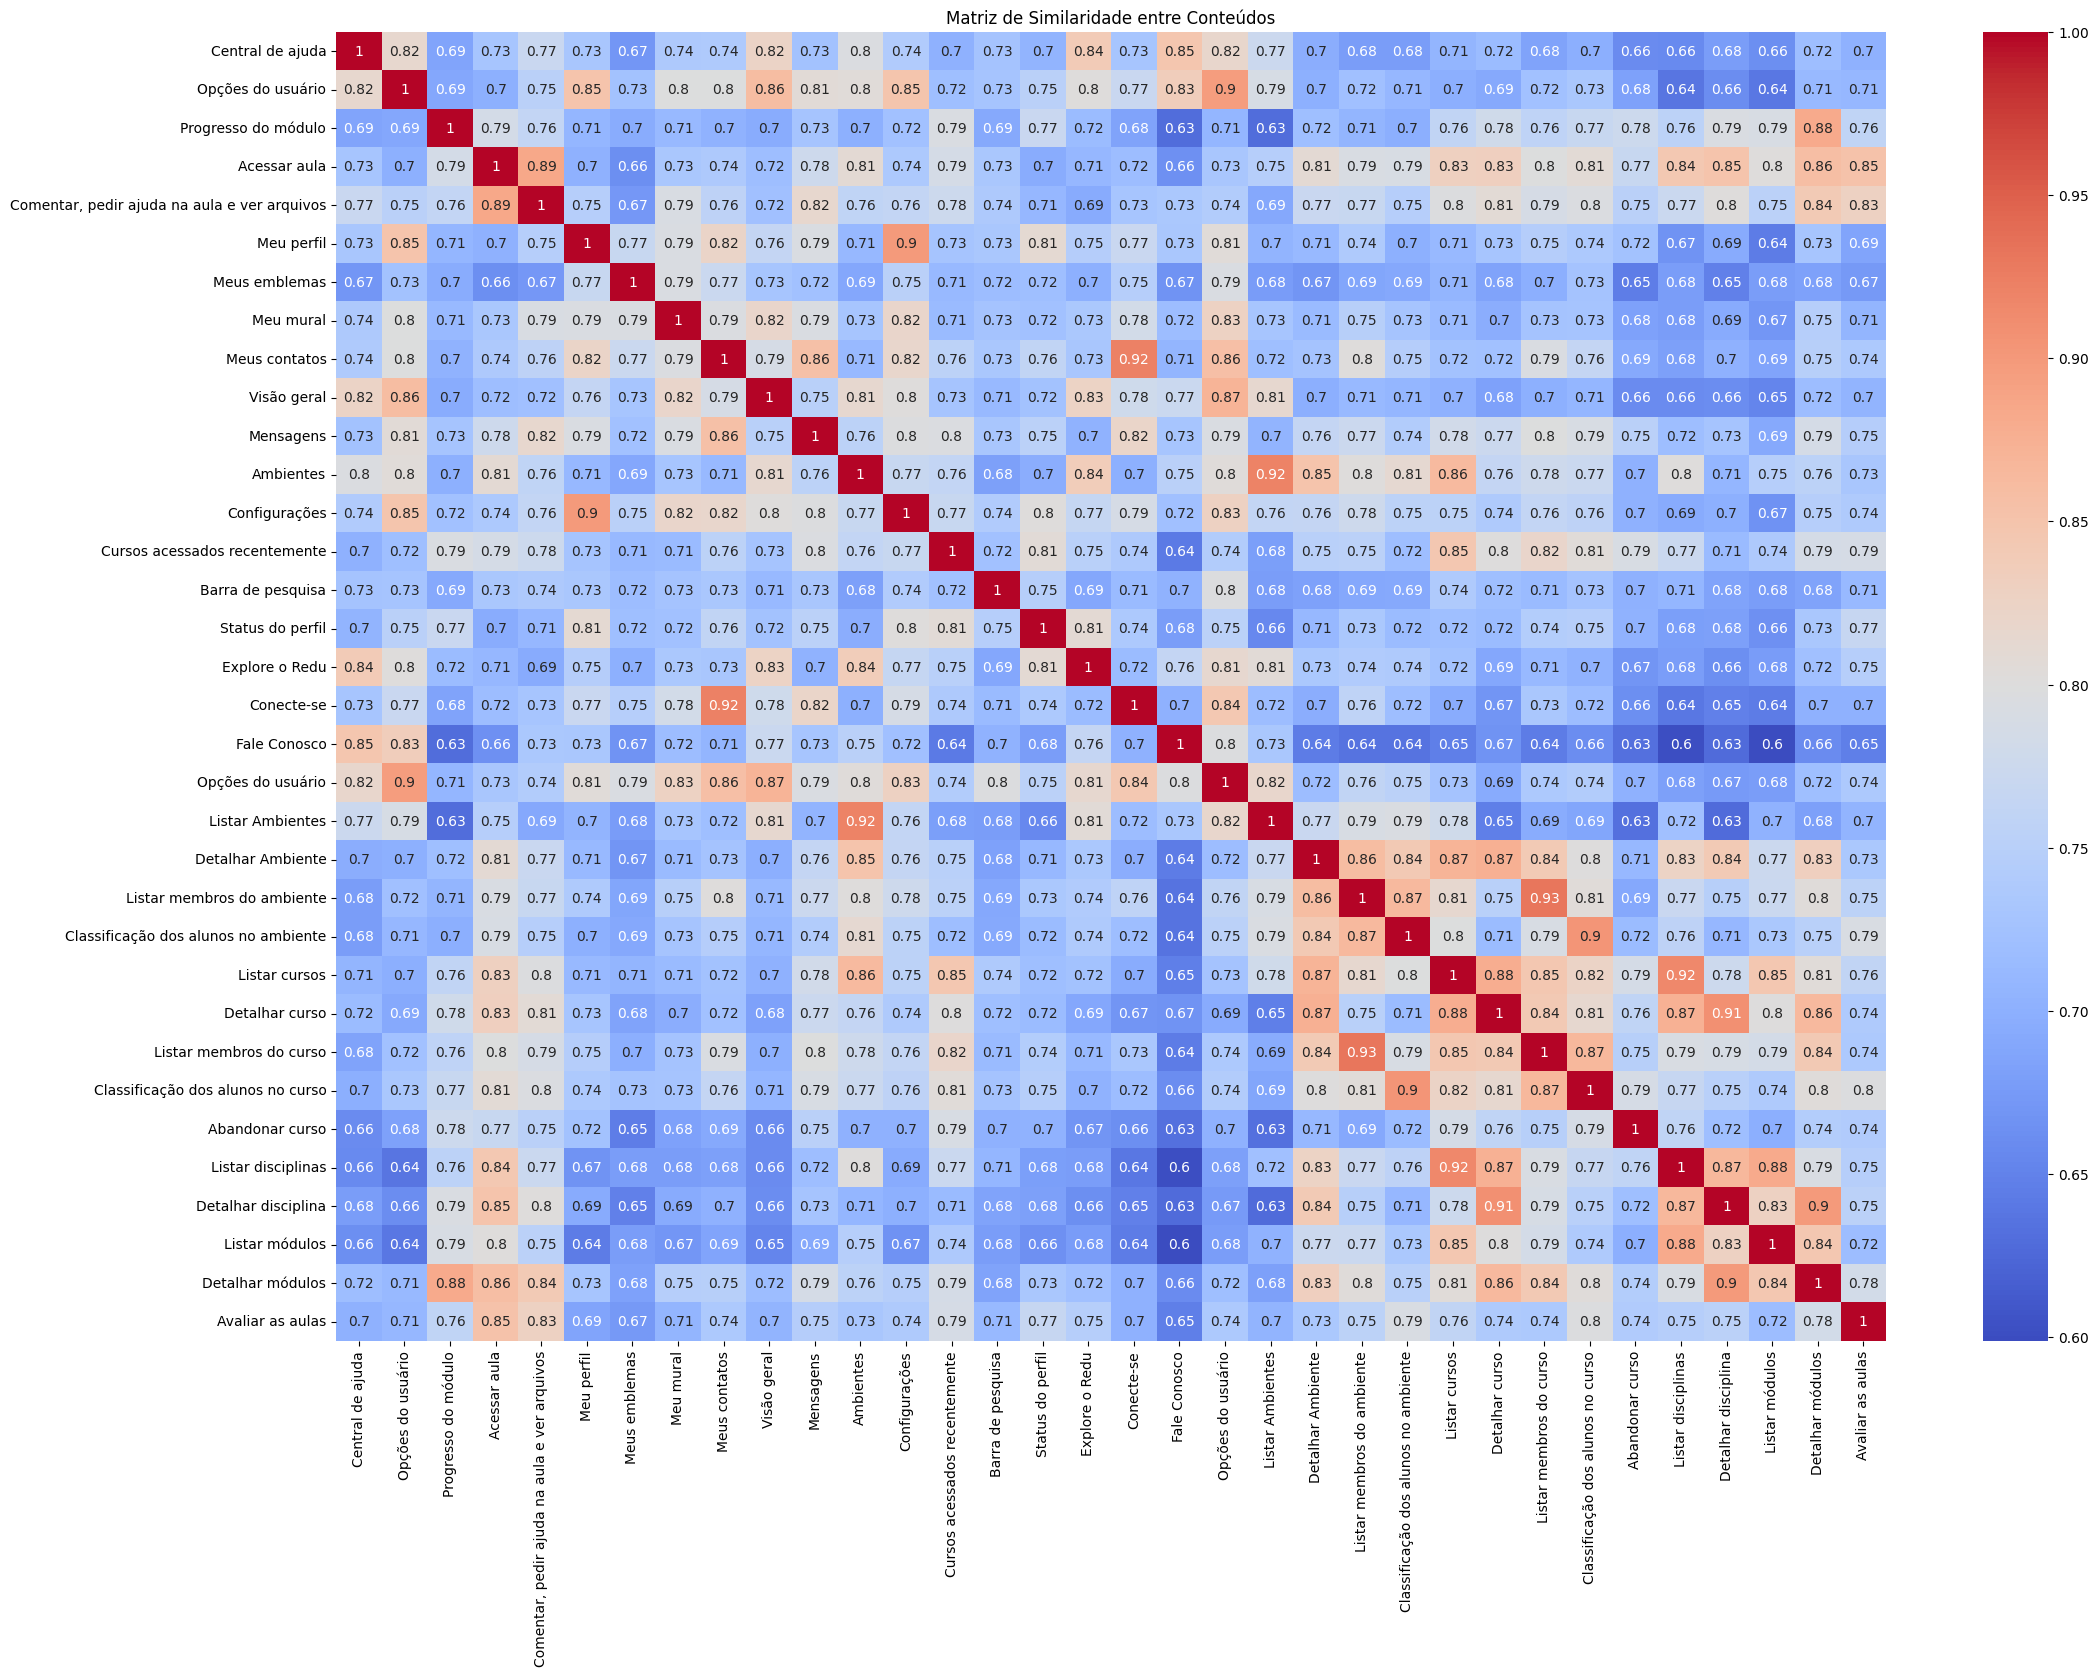

In [ ]:
# 1. Matriz de Similaridade (Heatmap)
similarity_matrix = cosine_similarity(vectors)

# Ajustar o tamanho da figura
plt.figure(figsize=(25, 17))  # Aumenta a largura para 16 e a altura para 12 polegadas

# Plotar a Matriz de Similaridade
sns.heatmap(similarity_matrix, xticklabels=df['Titulo'], yticklabels=df['Titulo'], annot=True, cmap='coolwarm')
plt.title('Matriz de Similaridade entre Conteúdos')
plt.show()

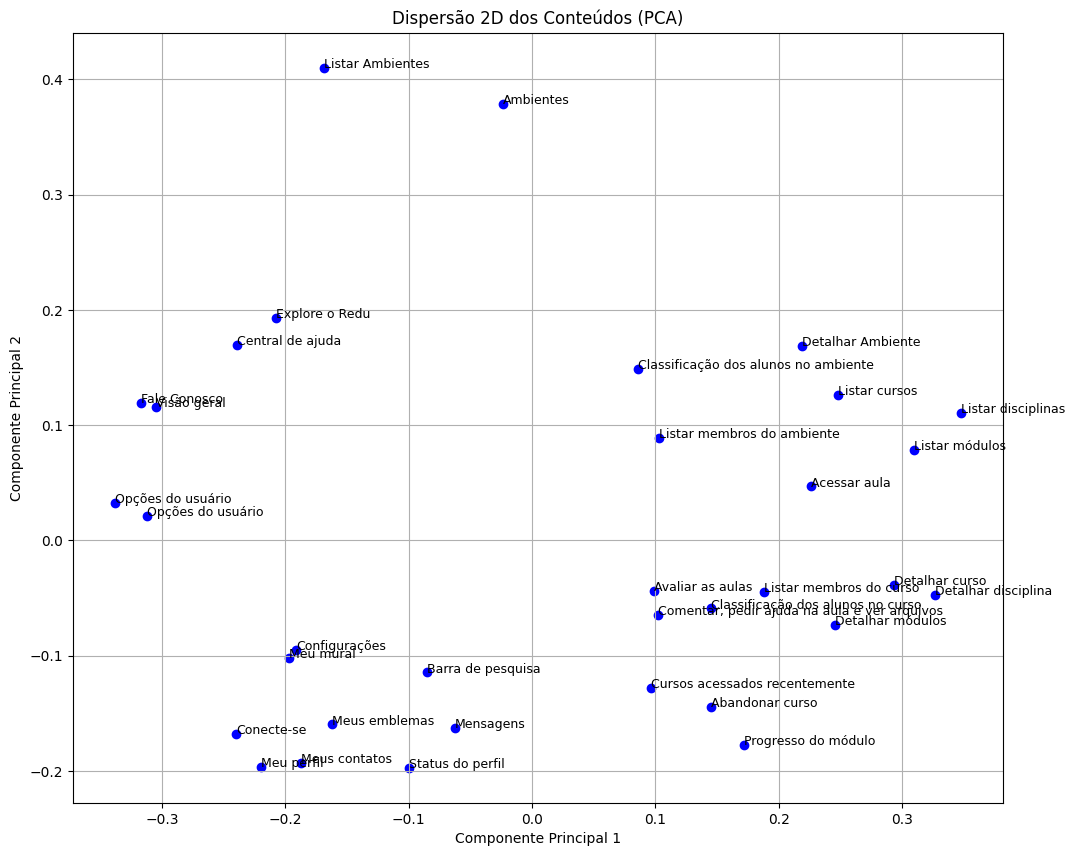

In [ ]:
# 2. Gráfico de Dispersão 2D (PCA)
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)
plt.figure(figsize=(12, 10))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c='blue')
for i, title in enumerate(df['Titulo']):
    plt.text(reduced_vectors[i, 0], reduced_vectors[i, 1], title, fontsize=9)
plt.title('Dispersão 2D dos Conteúdos (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


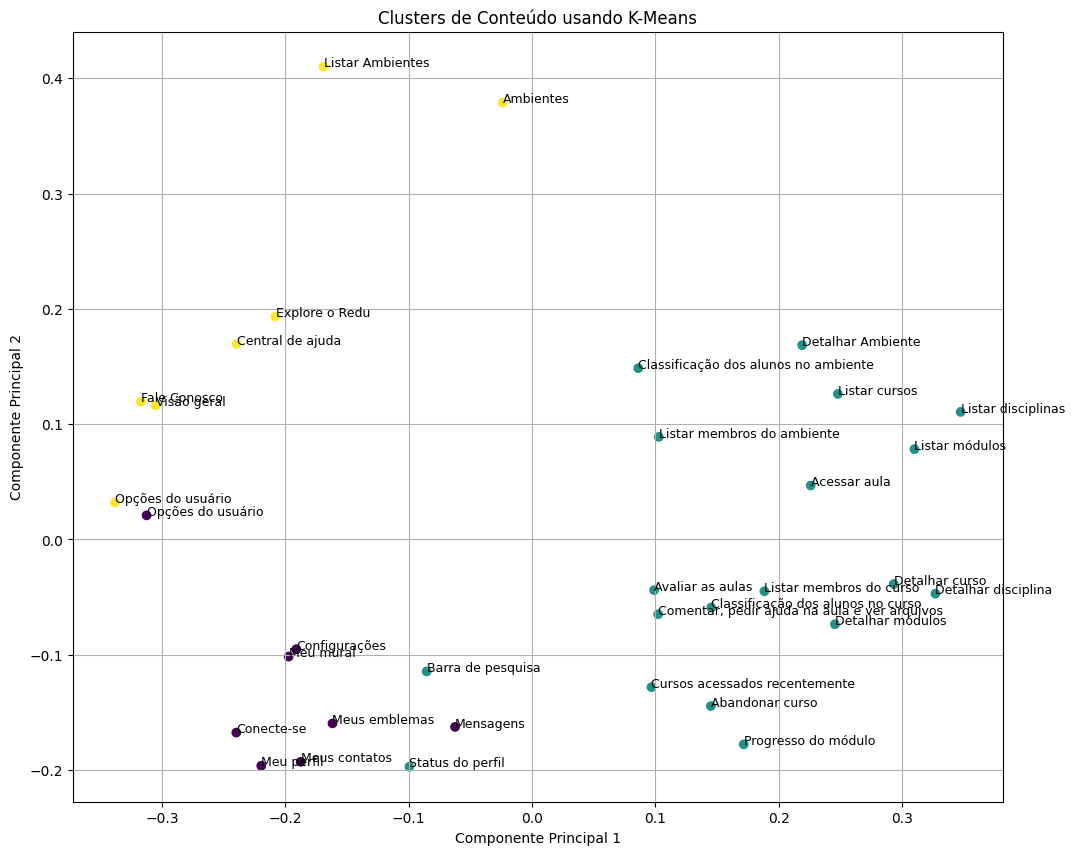

In [ ]:
# 3. Clusters de Conteúdo (K-Means)
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(vectors)
plt.figure(figsize=(12, 10))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=clusters, cmap='viridis')
for i, title in enumerate(df['Titulo']):
    plt.text(reduced_vectors[i, 0], reduced_vectors[i, 1], title, fontsize=9)
plt.title('Clusters de Conteúdo usando K-Means')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

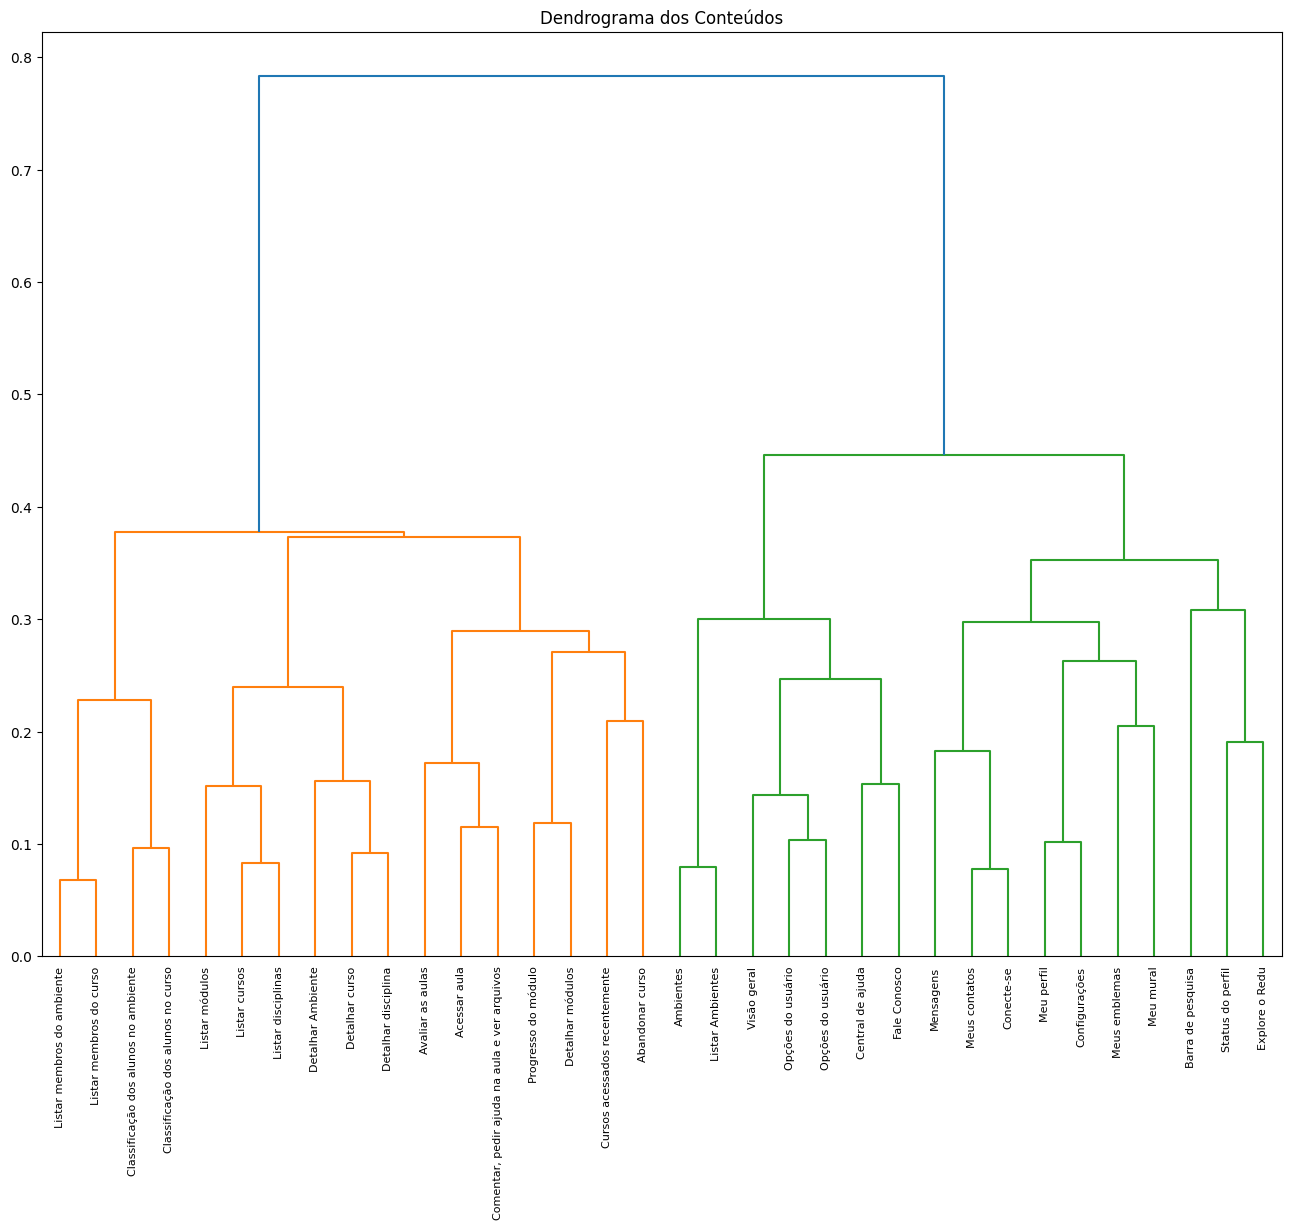

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

# Supondo que similarity_matrix é a sua matriz de similaridade
# Converta a matriz de similaridade para uma matriz de dissimilaridade (distância)
dissimilarity_matrix = 1 - similarity_matrix

# Transformar a matriz de dissimilaridade em uma forma vetorizada
# Precisamos da forma vetorizada para o linkage
dissimilarity_vector = squareform(dissimilarity_matrix, checks=False)

# Realizar o linkage (agrupamento hierárquico)
Z = linkage(dissimilarity_vector, method='ward')

# Ajustar o tamanho da figura
plt.figure(figsize=(16, 12))

# Gerar o dendrograma
dendrogram(Z, labels=df['Titulo'].values, orientation='top', leaf_rotation=90)

# Definir o título do dendrograma
plt.title('Dendrograma dos Conteúdos')

# Exibir o gráfico
plt.show()

In [ ]:
import pandas as pd

# Supondo que o dissimilarity_vector seja uma lista ou um array numpy


# Criar um DataFrame com o vetor de dissimilaridade
df = pd.DataFrame(dissimilarity_vector, columns=['Dissimilarity'])
df = pd.DataFrame(dissimilarity_vector, columns=[''])

# Salvar o DataFrame em um arquivo CSV
df.to_csv('dissimilarity_vector.csv', index=False)

print("O arquivo dissimilarity_vector.csv foi salvo com sucesso.")

O arquivo dissimilarity_vector.csv foi salvo com sucesso.


In [ ]:
def gerar_e_buscar_consulta(consulta, base, model):
  embedding_da_consulta = its_redu.embed_content(model=model,
                                 content=consulta,
                                 task_type="RETRIEVAL_QUERY")["embedding"]

  produtos_escalares = np.dot(np.stack(df["Embeddings"]), embedding_da_consulta)

  indice = np.argmax(produtos_escalares)
  return df.iloc[indice]["Conteudo"]

In [ ]:
consulta = "Como faço para usar o redu?"

trecho = gerar_e_buscar_consulta(consulta, df, model)
print(trecho)

Ao lado direito da página inicial, abaixo de 'Explore o Redu', encontramos a aba 'Saiba Mais', em que é possível ler mais informações sobre o que é possível fazer com o Redu e ter suas dúvidas respondidas. Ao clicar, você será redirecionado para outra página contendo uma barra de pesquisa, guias de funcionamento do Redu e opções de atendimento online.


In [ ]:
generation_config = {
  "temperature": 0,
  "candidate_count": 1
}

In [ ]:
prompt = f"Reescreva esse texto de uma forma mais descontraída, sem adicionar informações que não façam parte do texto: {trecho}"

model_2 = its_redu.GenerativeModel("gemini-1.0-pro",
                                generation_config=generation_config)
response = model_2.generate_content(prompt)
print(response.text)

Na página inicial, do lado direito, logo abaixo do "Explore o Redu", tem uma aba chamada "Saiba Mais". É tipo um manualzinho onde você pode descobrir tudo o que dá pra fazer com o Redu e tirar suas dúvidas.

Quando você clica nela, vai pra outra página que tem uma caixinha de busca, uns guias pra te ensinar a usar o Redu e umas opções pra você falar com a gente online.


In [ ]:
import pandas as pd
import numpy as np

# Supondo que o DataFrame já exista com as colunas "Titulo" e "Conteudo"
# e que você tem o vetor de dissimilaridade calculado
# vectors = np.array(df["Embeddings"].tolist())  # Vetores de embeddings

# Adicione a coluna de dissimilaridade ao DataFrame (ajuste conforme necessário)
# df['Dissimilarity'] = dissimilarity_vector  # Substitua pelo seu vetor de dissimilaridade

# Salvar o DataFrame completo em um arquivo CSV
df.to_csv('vectors_with_dissimilarity.csv', columns=["Titulo", "Conteudo", "Embeddings"], index=False)

print("O arquivo vectors_with_dissimilarity.csv foi salvo com sucesso.")

O arquivo vectors_with_dissimilarity.csv foi salvo com sucesso.
